The goal of this notebook is take a lookon Random Walks as baseline of some other stochastic models.

For our examples we will use the next libraries that will help us with some tasks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew , kurtosis
import pandas as pd


# Random Walks
Defined by Grimmet & Stirzaker (2001) as one of the simplest random processes. Thus this phenomenom is commonly related with the observation done by Robert Brown in 1827 regarding the irregular movement of small pollen grains in a liquid under his microscope, say Telcs (2006). Aditionally, there are numerous generalizations with different kind of object as representation like trees, graphs of group automorphism, weighted graphs, and others.

Nevertheless, a strictly and explicit definition is hard to be set specially from technical books regarding the subject but the meaning is build using an example.

This example will be extended to build a **symetric** random walk, meaning the probability $p$ of going in either A direction or B direction is the same, meaning $p=\frac{1}{2}$ and its complement $q = 1 - p = \frac{1}{2}$.

Imagine there is a random variable $X$ going along the forest. The random variable wants just walking along the forest following a radar signal which has only to outputs go left and go right. The mechanism internally in the radar is similar to tossing a coin, a fair one. This let us to be sure the probability will be $\frac{1}{2}$ on each toss. So, now we can imagine going forward doing $T$ steps and each one asking the radar provide us the signal for the next step. We start in $X_0 = 0$.

The radar output is mapped as:

$$ NextStep(p) = S_t =  \left\{
\begin{array}{ll}
      left = -1 & 0<=p<0.5 \\
      right = 1 & 0.5<=p<=1 \\
\end{array} 
\right.  $$

Our first experiment will be doing $T=30$ steps. It means after 30 steps the random variable will be in:

$$X_T = X_0 + \sum_{t=1}^T S_t$$

It means after the random variable $X$ do T steps, following the radar it'll be in the position $X_T$. This applies also for any moment $t <= T$.

```python
# An empty numpy vector is built in order to store there the value of our position in the forest.
# It is build a numpy vector with T+1 elements in order to save also the first position
# Is set a random seed in order to make the simulation able to be replicated
```

Additionally, analizing the information such as expected value and variance of $X_t$ we get:

$$ E[ S_t ] = \frac{1}{2} * 1 + \frac{1}{2} * -1 = 0 $$

$$ Var[ S_t ] = E[ (S_t - E[ S_t ])^2 ] $$

$$ Var[ S_t ] = E[ S_t^2 - 2 *  S_t * E[ S_t ] + E[ S_t ]^2 ] $$

.. because $E[ S_t ] = 0$, then ...

$$ Var[ S_t ] = E[ S_t^2 ] $$

$$ Var[ S_t ] = \frac{1}{2} * 1^2 + \frac{1}{2} * (-1)^2  = 1 $$

In [2]:
np.random.seed(10)

In [3]:
T = 30
X = np.empty(T+1)
X[0] = 0 # First position

Now we are going to do steps following the signal of the radar, but where will we be after 10 steps?.  For answer this question we need to do step by step and at the end to assess the difference between the last position in vector X with the first position, $X_T - X_0$.

In [4]:
def do_steps(X:np.array,T:int) -> None:
    """Function which replicate the action of doing steps T times

    Args:
        X (np.array): Numpy array with the position of the random variable X
        T (int): Number of steps for doing
    """    
    for i in range(T): # doing steps
        X[i+1] = X[i] + np.random.choice([1,-1])


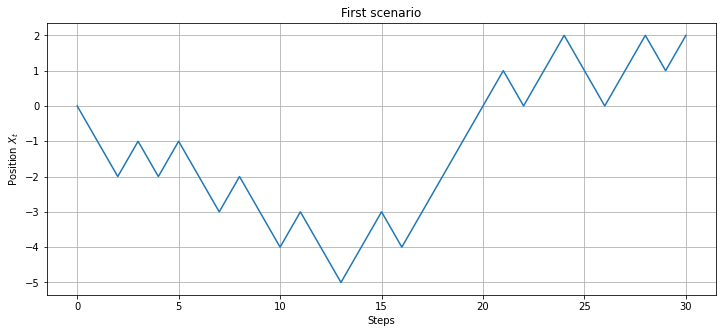

In [5]:
plt.figure(figsize=(12,5))

do_steps(X=X,T=T)

plt.plot(X)
plt.grid()
plt.ylabel('Position $X_t$')
plt.xlabel('Steps')
plt.title('First scenario')
plt.show()

As you can see above the path plotted is the result of apply once 10 steps to the random variable behaviour. Nevertheless, there is important we are working with probabilities, and therefore it is one of the potential outputs for walking performed for random variable $X$. In this sense we could repeat the excercise many $K$ times in order to see what happen in the path. In this case we will repeat the excercise $K=30$ times.

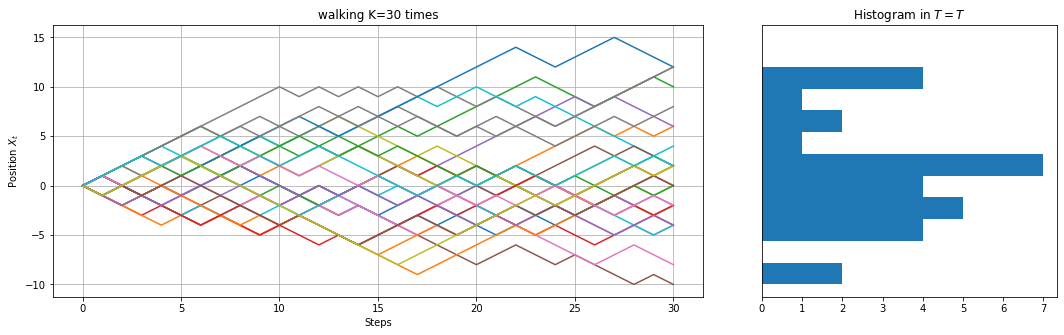

In [6]:
fig = plt.figure(figsize=(18,5))
spec = fig.add_gridspec(1,3)

K = 30
X_paths = np.empty((K, T+1))
ax_paths = fig.add_subplot(spec[0,:2])
for path_i in range(K):
    do_steps(X=X,T=T)
    X_paths[path_i] = X
    ax_paths.plot(X)
ax_paths.grid()
ax_paths.set_ylabel('Position $X_t$')
ax_paths.set_xlabel('Steps')
ax_paths.set_title(f'walking K={K} times')

ax_histogram = fig.add_subplot(spec[0,2:])
ax_histogram.hist(X_paths[:,-1], orientation='horizontal')
ax_histogram.set_title('Histogram in $T={T}$')
ax_histogram.set_ylim(ax_paths.get_ylim())
ax_histogram.get_yaxis().set_visible(False)

plt.show()

What you can see above is the result of repeat the random walking many times. But, hold on!. This kind of random processes have some particular properties, such as:
- As we defined above, the probability associated with the next step process depends of nothing and following the property of being always with $p=50\%$. It means the increment is defined as i.i.d (independent and identically distributed).

$$(X_1 - X_0),(X_2 - X_1),(X_3 - X_2), ... ,(X_T - X_{T-1}) \sim i.i.d $$

- As time goes up, the position in $t=t_i$, being $0 \leq t \leq T$, the position may be steemed from:

$$\sum_{i=1}^{t} (X_i - X_{i-1}) = (X_t - X_0) = \sum_{i=1}^{t} S_i $$

being $t=T$ then:

$$X_T - X_0 = \sum_{i=1}^{T} S_i $$

# Law of Large Numbers

## T = 100, K = 1000
No to build another relevant specifications of this kind of random walk, we are going to increase the number of $T=100$, and $K=100$ to observe some statistical properties.

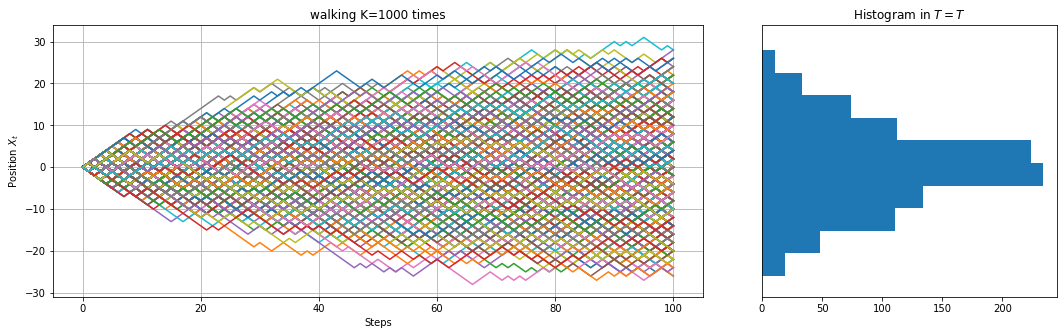

In [7]:
fig = plt.figure(figsize=(18,5))
spec = fig.add_gridspec(1,3)

T=100
K = 1000
X = np.empty(T+1)
X_paths = np.empty((K, T+1))
ax_paths = fig.add_subplot(spec[0,:2])
for path_i in range(K):
    do_steps(X=X,T=T)
    X_paths[path_i] = X
    ax_paths.plot(X)
    
ax_paths.grid()
ax_paths.set_ylabel('Position $X_t$')
ax_paths.set_xlabel('Steps')
ax_paths.set_title(f'walking K={K} times')

ax_histogram = fig.add_subplot(spec[0,2:])
ax_histogram.hist(X_paths[:,-1], orientation='horizontal')
ax_histogram.set_title('Histogram in $T={T}$')
ax_histogram.set_ylim(ax_paths.get_ylim())
ax_histogram.get_yaxis().set_visible(False)

plt.show()

In [8]:
print('Average   : ',X_paths[:,-1].mean())
print('Skew      : ',skew(X_paths[:,-1]))
print('Kurtosis  : ',kurtosis(X_paths[:,-1]))

Average   :  -0.176
Skew      :  0.02646659383942704
Kurtosis  :  -0.07723532793357757


## Martingale Property
Mean Convergence

In [9]:
K_range = range(100,5000)
X_T_mean = np.empty(K_range.__len__())
T=100
values_X = dict()
for K in K_range:
    values_X[f'values_K_{K}'] = np.random.choice([-1,1],size=(K,T))
    X_T_mean[K-100] = values_X[f'values_K_{K}'].sum(axis=1).mean()

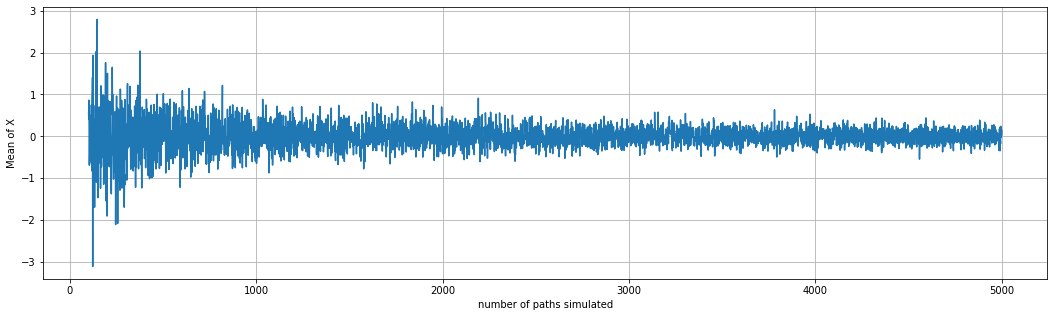

In [10]:
fig = plt.figure(figsize=(18,5))

plt.plot(K_range, X_T_mean)
plt.ylabel('Mean of X')
plt.xlabel('number of paths simulated')
plt.grid()
plt.show()

To analyze the phenomenom of martingale in a symetric random walk it was run a trial where the number of paths on each simulation is increasing. With this is observed the convergence of the mean of las value of each simulation.

In more technical words the property when the expected value (mean) of a random variable is almost the same than its initial value, is defined as martingale. In this sense a symetric random walk is considered margintale. (We are omiting the definition of filtration $F_t$ for the moment) being $s < t$.

Adding and subtracting $X_s$ ...

$$ E[X_t | F_s] = E[X_t + X_s - X_s | F_s] $$

then after grouping ...

$$ E[X_t | F_s] =  E[(X_t - X_s) + X_s | F_s] $$

$$ E[X_t | F_s] = E[X_t - X_s | F_s] + E[X_s | F_s] $$

.. because $ E[X_s | F_s] = X_s $ ...

$$ E[X_t | F_s] = E[X_t - X_s | F_s] + X_s$$

$$ E[X_t | F_s] = E[X_t - X_s] + X_s $$

.. if you remember above $E[X_t - X_s] = E[ S_{t-s} ] = 0$

$$ E[X_t | F_s] = X_s$$

It means the symetric random walk is margingale.

## Standard Deviation

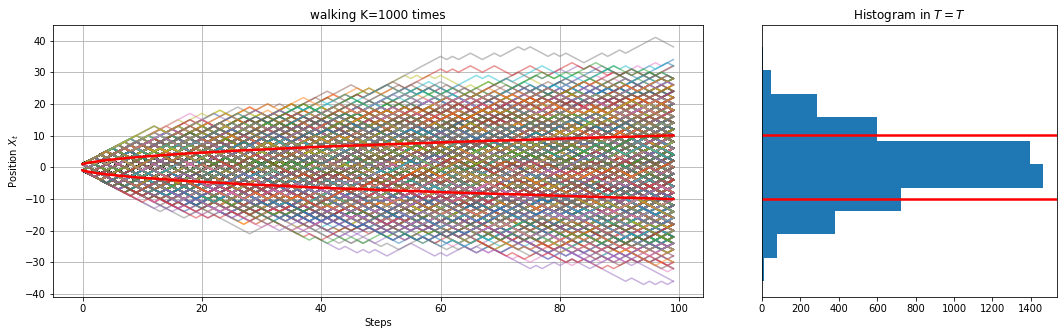

In [46]:
fig = plt.figure(figsize=(18,5))
spec = fig.add_gridspec(1,3)

T=100
K = 1000
X = np.empty(T+1)
#X_paths = np.empty((K, T+1))
ax_paths = fig.add_subplot(spec[0,:2])
X = values_X[list(values_X.keys())[-1]].cumsum(axis=1)
for path_i in range(X.shape[0]):
    ax_paths.plot(X[path_i,:], alpha=0.5)
    
ax_paths.plot(values_X[list(values_X.keys())[-1]].cumsum(axis=1).std(axis=0), color='red', linewidth=2.5)
ax_paths.plot(-values_X[list(values_X.keys())[-1]].cumsum(axis=1).std(axis=0), color='red', linewidth=2.5)
ax_paths.grid()
ax_paths.set_ylabel('Position $X_t$')
ax_paths.set_xlabel('Steps')
ax_paths.set_title(f'walking K={K} times')

ax_histogram = fig.add_subplot(spec[0,2:])
ax_histogram.hist(X_paths[:,-1], orientation='horizontal')
ax_histogram.axhline(X_paths[:,-1].std(), color='red', linewidth=2.5)
ax_histogram.axhline(-X_paths[:,-1].std(), color='red', linewidth=2.5)
ax_histogram.set_title('Histogram in $T={T}$')
ax_histogram.set_ylim(ax_paths.get_ylim())
ax_histogram.get_yaxis().set_visible(False)

plt.show()

# The First Passage Times

Treated in chanper 3 of Bhattacharya & Waymire (2021), it is defined as the analysis on which a random variable $X^0$ starting at zero reaches the level or state $y$, $X_y^0$.

# Bibliography

- Grimmet, G. & Stirzaker, D. (2001). Probability and random processes. Third Edition. Oxford University Press.
- Telcs, A. (2006). The art of random walks. Springer editorial.
- Bhattacharya, R. & Waymire, E. (2021). Random Walk, brownian motion, and martingales. Springer Editorial.